In [1]:
from tensorflow.keras.datasets import imdb
max_features = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

In [2]:
from tensorflow.keras.preprocessing import sequence
max_len = 100
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

In [3]:
x_train.shape

(25000, 100)

In [4]:
y_test.shape

(25000,)

In [5]:
y_train.shape

(25000,)

In [6]:
y_test[:10]

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1], dtype=int64)

In [7]:
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [8]:
y_test_one_hot.shape

(25000, 2)

In [9]:
y_test_one_hot[0]

array([1., 0.], dtype=float32)

In [10]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [11]:
model = models.Sequential()
model.add(layers.Embedding(max_features, 128))
model.add(layers.SimpleRNN(64, return_sequences=True))
model.add(layers.SimpleRNN(32))
model.add(layers.Dense(2, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         1280000   
                                                                 
 simple_rnn (SimpleRNN)      (None, None, 64)          12352     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 32)                3104      
                                                                 
 dense (Dense)               (None, 2)                 66        
                                                                 
Total params: 1,295,522
Trainable params: 1,295,522
Non-trainable params: 0
_________________________________________________________________


In [12]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
checkpoint_filepath = './temp/checkpoint_stacked'
mc = ModelCheckpoint(checkpoint_filepath, monitor='val_loss', mode='min', 
                     save_weights_only=True, save_best_only=True)

In [13]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics='accuracy')

In [14]:
history=model.fit(x_train, y_train_one_hot, epochs=20, batch_size=128, validation_split=0.2, callbacks=[es, mc])

Epoch 1/20
157/157 [==============================] - 7s 39ms/step - loss: 0.6071 - accuracy: 0.6495 - val_loss: 0.5113 - val_accuracy: 0.7588
Epoch 2/20
157/157 [==============================] - 6s 36ms/step - loss: 0.3804 - accuracy: 0.8401 - val_loss: 0.4765 - val_accuracy: 0.8000
Epoch 3/20
157/157 [==============================] - 6s 37ms/step - loss: 0.2607 - accuracy: 0.8983 - val_loss: 0.4472 - val_accuracy: 0.8024
Epoch 4/20
157/157 [==============================] - 6s 37ms/step - loss: 0.1284 - accuracy: 0.9551 - val_loss: 0.5916 - val_accuracy: 0.8186
Epoch 5/20
157/157 [==============================] - 6s 38ms/step - loss: 0.0451 - accuracy: 0.9860 - val_loss: 0.8231 - val_accuracy: 0.7754
Epoch 6/20
157/157 [==============================] - 6s 38ms/step - loss: 0.0198 - accuracy: 0.9937 - val_loss: 0.9852 - val_accuracy: 0.7408
Epoch 7/20
157/157 [==============================] - 6s 38ms/step - loss: 0.0131 - accuracy: 0.9961 - val_loss: 1.0017 - val_accuracy: 0.7566

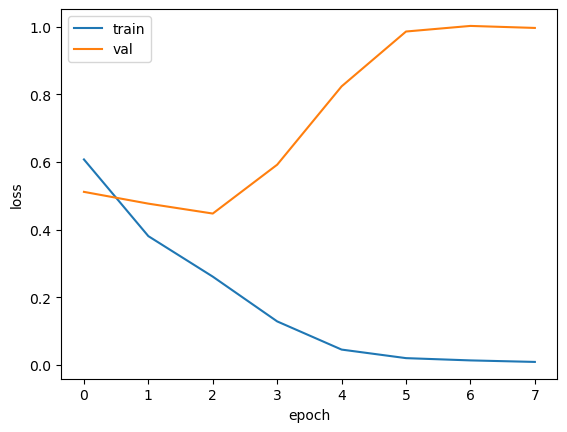

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [16]:
model.load_weights(checkpoint_filepath)

In [17]:
test_loss, test_acc = model.evaluate(x_test,y_test_one_hot)

782/782 [==============================] - 4s 5ms/step - loss: 0.4431 - accuracy: 0.8085


In [18]:
print('test_acc:', test_acc)

test_acc: 0.8084800243377686
